# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [1]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')



NameError: name 'pd' is not defined

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
Shapes:

Tesla DataFrame shape: (124, 3)
Bitcoin Search DataFrame shape: (73, 2)
Bitcoin Price DataFrame shape: (2204, 3)
Unemployment DataFrame shape (2004-2019): (181, 3)
Unemployment DataFrame shape (2004-2020): (200, 3)

Column Names:

Tesla DataFrame columns: Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
Bitcoin Search DataFrame columns: Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
Bitcoin Price DataFrame columns: Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
Unemployment DataFrame columns (2004-2019): Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
Unemployment DataFrame columns (2004-2020): Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

SyntaxError: invalid syntax (2588633556.py, line 1)

In [1]:
print(f'Largest value for Tesla in Web Search: ')
print(f'Smallest value for Tesla in Web Search: ')

Largest value for Tesla in Web Search: 
Smallest value for Tesla in Web Search: 


In [ ]:
The Daily Bitcoin Price is daily. the others are on a Monthly cycle. 

### Unemployment Data

In [2]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ')

Largest value for "Unemployemnt Benefits" in Web Search: 


### Bitcoin

In [6]:
print(f'largest BTC News Search: ')

largest BTC News Search: 


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [7]:
print(f'Missing values for Tesla?: ')
print(f'Missing values for U/E?: ')
print(f'Missing values for BTC Search?: ')

Missing values for Tesla?: 
Missing values for U/E?: 
Missing values for BTC Search?: 


In [8]:
print(f'Missing values for BTC price?: ')

Missing values for BTC price?: 


In [5]:
print(f'Number of missing values: ')

Number of missing values: 


**Challenge**: Remove any missing values that you found. 

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

# Data Visualisation

### Notebook Formatting & Style Helpers

In [22]:
# Create locators for ticks on the time axis

In [21]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

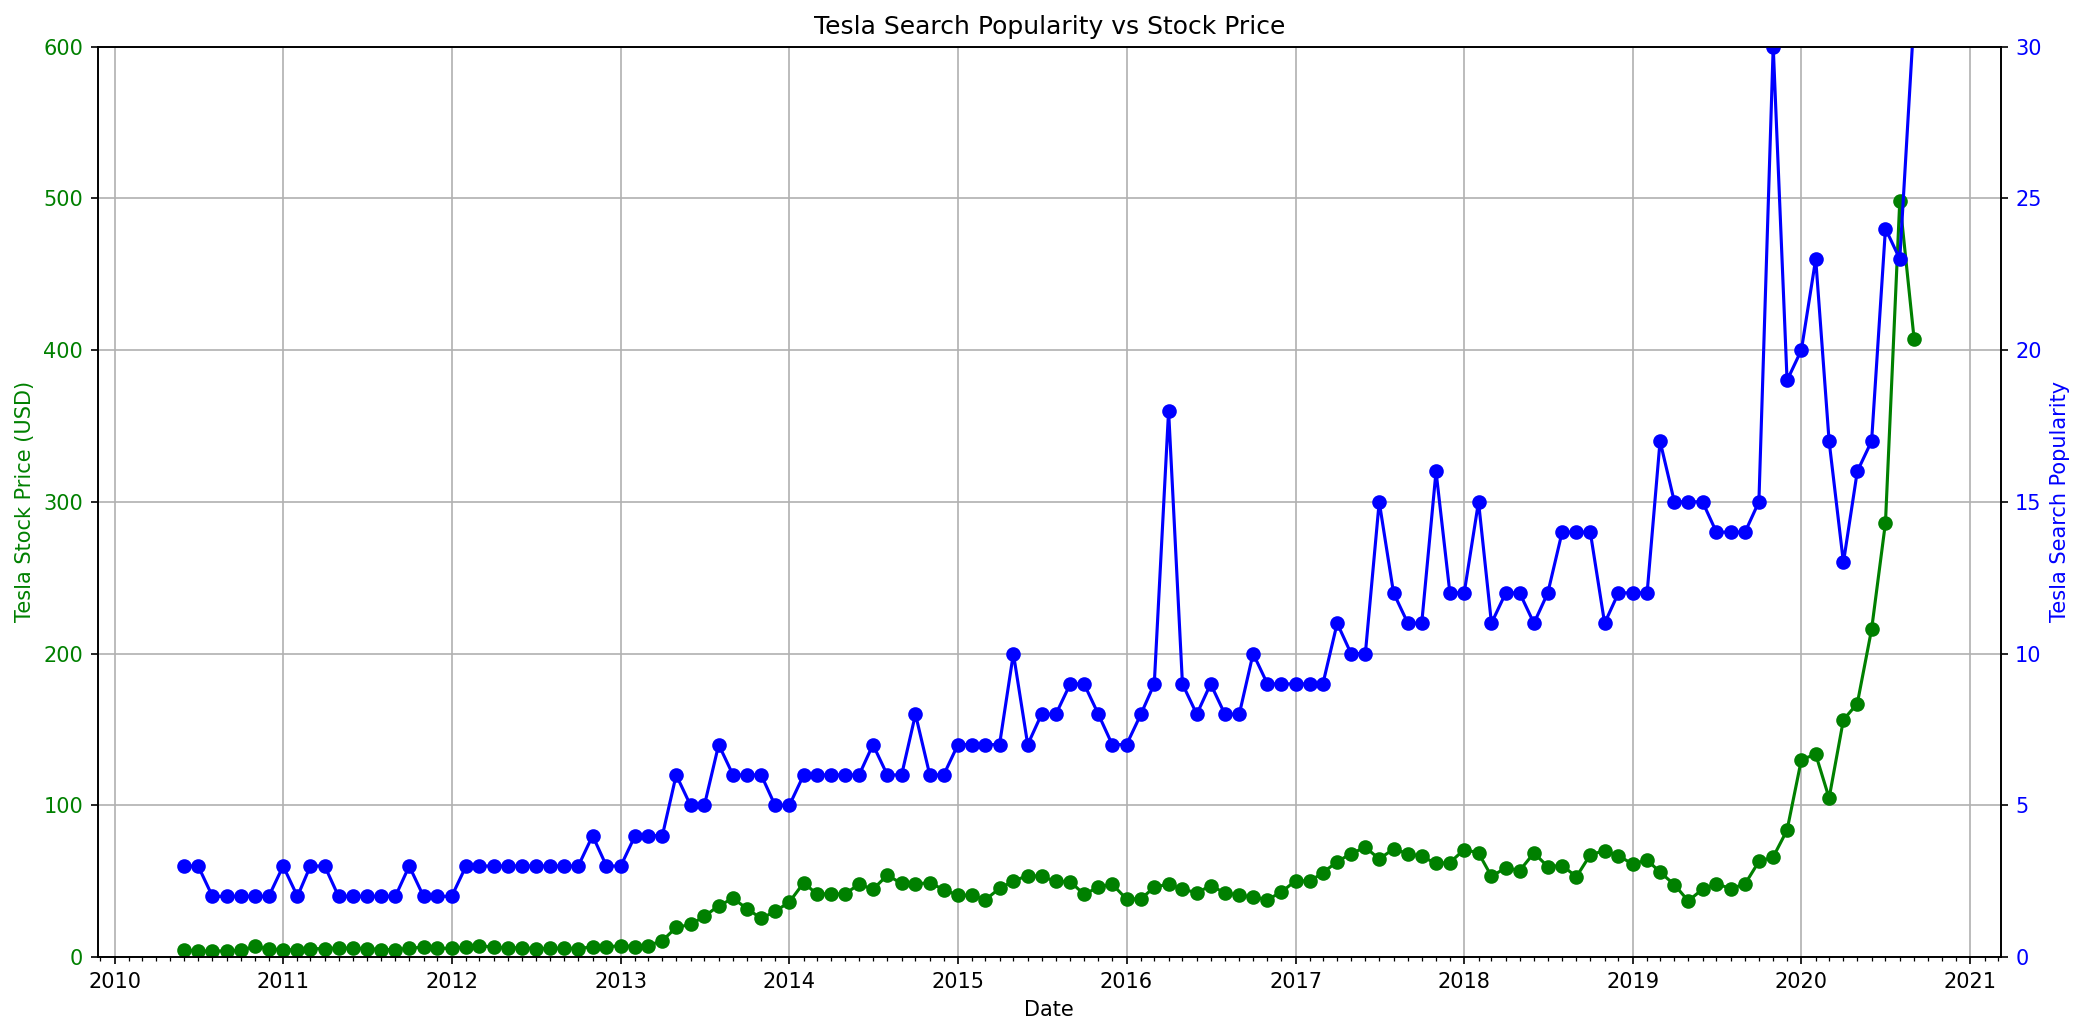

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set up date locators and formatters for the x-axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# File path
file_path_tesla = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0079__Day75_GoogleData_Resampling_and_Visualizing_Time_Series_240819\NewProject\r00-r09 START\r00_env_START\TESLA Search Trend vs Price.csv'

# Load the data into a DataFrame
df_tesla = pd.read_csv(file_path_tesla)

# Convert 'MONTH' column to datetime format for better plotting
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])

# Prepare data for plotting
dates = df_tesla['MONTH']
search_popularity = df_tesla['TSLA_WEB_SEARCH']
stock_price = df_tesla['TSLA_USD_CLOSE']

# Create the figure and the first axis for the stock price
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=150)  # Increase DPI for higher quality

# Plot Tesla Stock Price on the first axis
ax1.plot(dates, stock_price, label='Tesla Stock Price', color='green', marker='o', linewidth=1.5)  # Increased line width by 50%
ax1.set_xlabel('Date')
ax1.set_ylabel('Tesla Stock Price (USD)', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_ylim(0, 600)  # Assuming the stock price can go up to 600 for better alignment

# Apply date locators and formatters to the x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

# Create a second y-axis for the search trend
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot Tesla Search Popularity on the second axis
ax2.plot(dates, search_popularity, label='Tesla Search Popularity', color='blue', marker='o', linewidth=1.5)  # Increased line width by 50%
ax2.set_ylabel('Tesla Search Popularity', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim(0, 30)  # Setting the max value for search trend to 30

# Add a grid to the plot
ax1.grid(True)

# Rotate x-axis labels for better readability and set the font size
plt.xticks(rotation=45, fontsize=14)  # Rotate labels and increase font size

# Add a title
plt.title('Tesla Search Popularity vs Stock Price')

# Ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

How to add tick formatting for dates on the x-axis. 

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

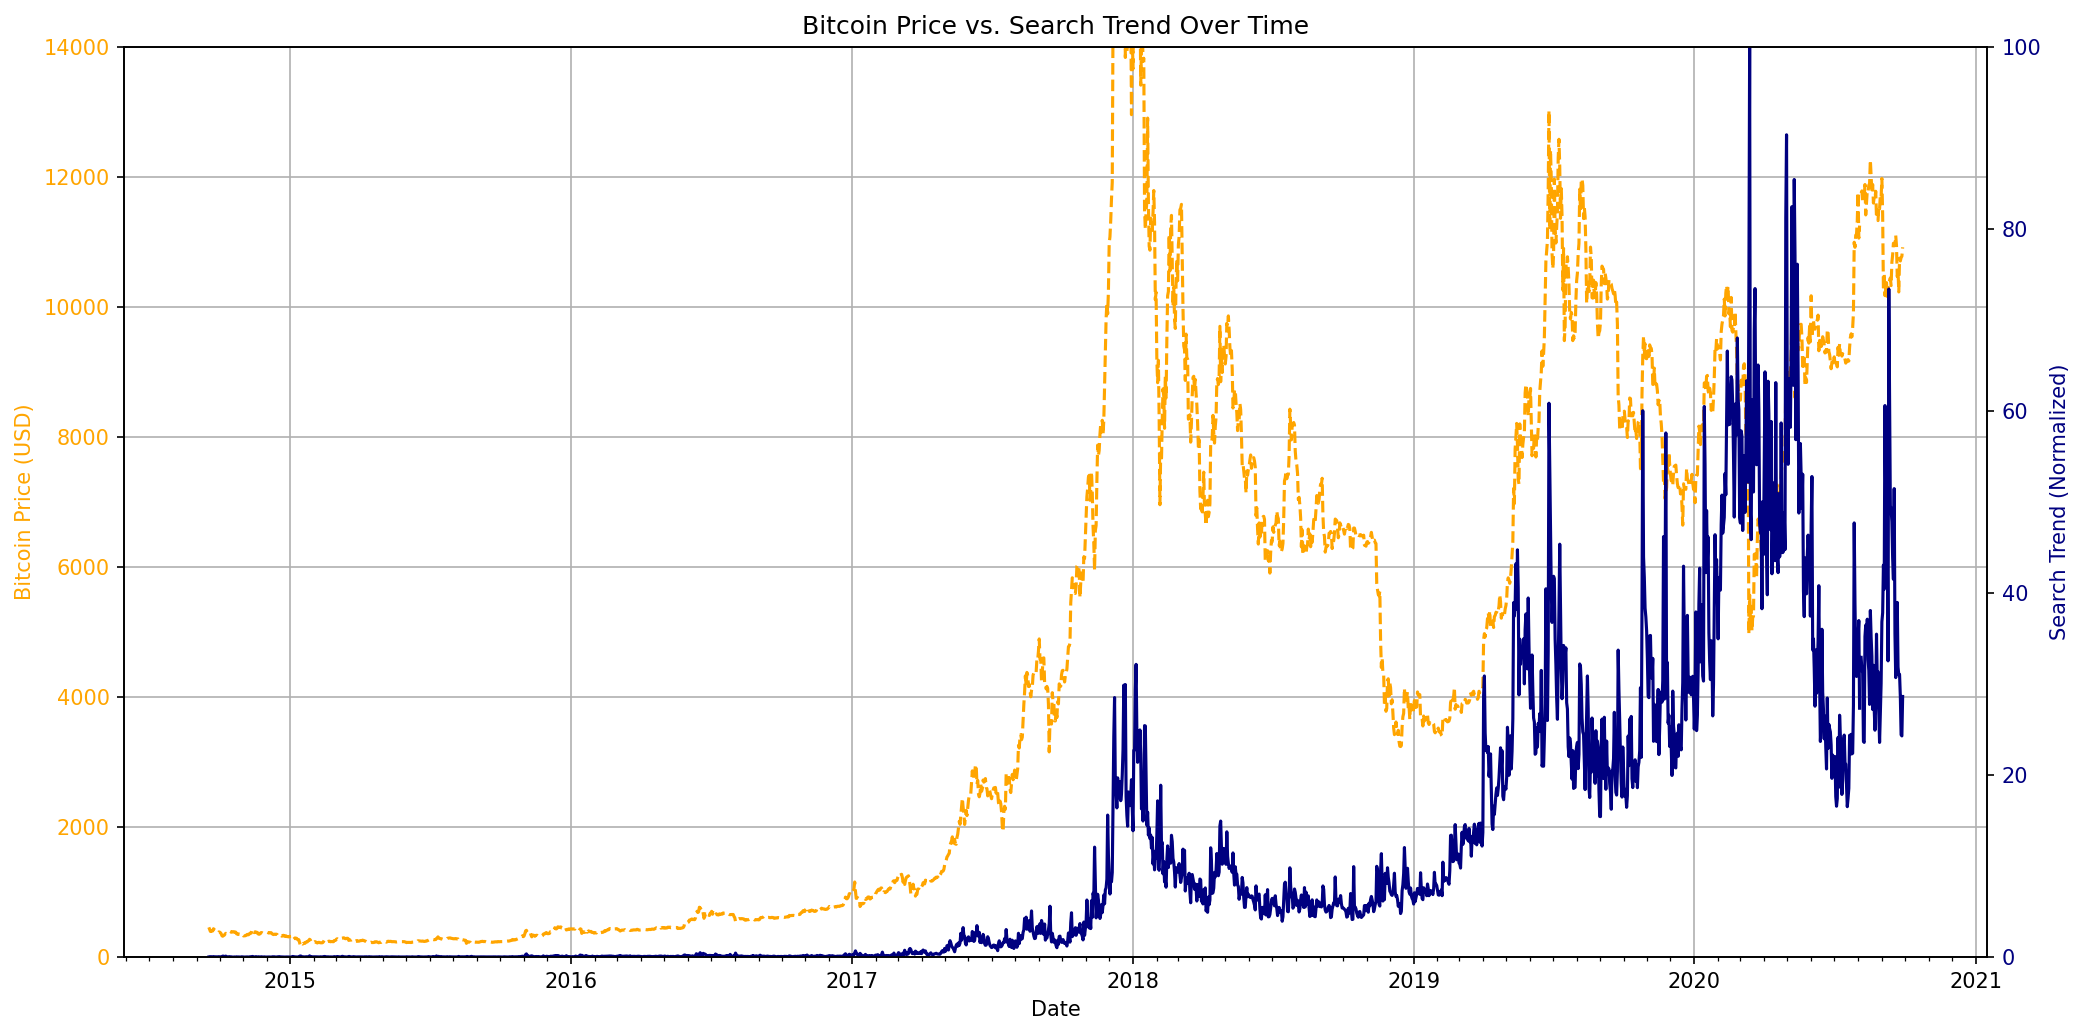

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set up date locators and formatters for the x-axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

# File path for Bitcoin data (relative path since it's in the same directory as the Tesla file)
file_path_btc = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0079__Day75_GoogleData_Resampling_and_Visualizing_Time_Series_240819\NewProject\r00-r09 START\r00_env_START\Daily Bitcoin Price.csv'

# Load the data into a DataFrame
df_btc = pd.read_csv(file_path_btc)

# Convert 'DATE' column to datetime format for better plotting
df_btc['DATE'] = pd.to_datetime(df_btc['DATE'])

# Normalize the 'VOLUME' data to fit within the 0-100 range for better plotting
btc_search_trend = (df_btc['VOLUME'] - df_btc['VOLUME'].min()) / (df_btc['VOLUME'].max() - df_btc['VOLUME'].min()) * 100

# Prepare data for plotting
dates = df_btc['DATE']
btc_price = df_btc['CLOSE']  # Bitcoin price is in the 'CLOSE' column

# Create the figure and the first axis for the Bitcoin price
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=150)  # Increase DPI for higher quality

# Plot Bitcoin Price on the first axis with a dotted orange line
ax1.plot(dates, btc_price, label='Bitcoin Price', color='orange', linestyle='--', linewidth=1.5)  # Dotted line for Bitcoin price
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price (USD)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')
ax1.set_ylim(0, 14000)  # Cap the Bitcoin price at 14,000

# Apply date locators and formatters to the x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_fmt)

# Create a second y-axis for the search trend
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot Search Trend on the second axis with a simple solid navy blue line
ax2.plot(dates, btc_search_trend, label='Search Trend', color='navy', linewidth=1.5)  # Simple solid navy line without markers
ax2.set_ylabel('Search Trend (Normalized)', color='navy')
ax2.tick_params(axis='y', labelcolor='navy')
ax2.set_ylim(0, 100)  # Cap the search trend at 100

# Add a grid to the plot
ax1.grid(True)

# Rotate x-axis labels for better readability and set the font size
plt.xticks(rotation=45, fontsize=14)  # Rotate labels and increase font size

# Add a title
plt.title('Bitcoin Price vs. Search Trend Over Time')

# Ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()



### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

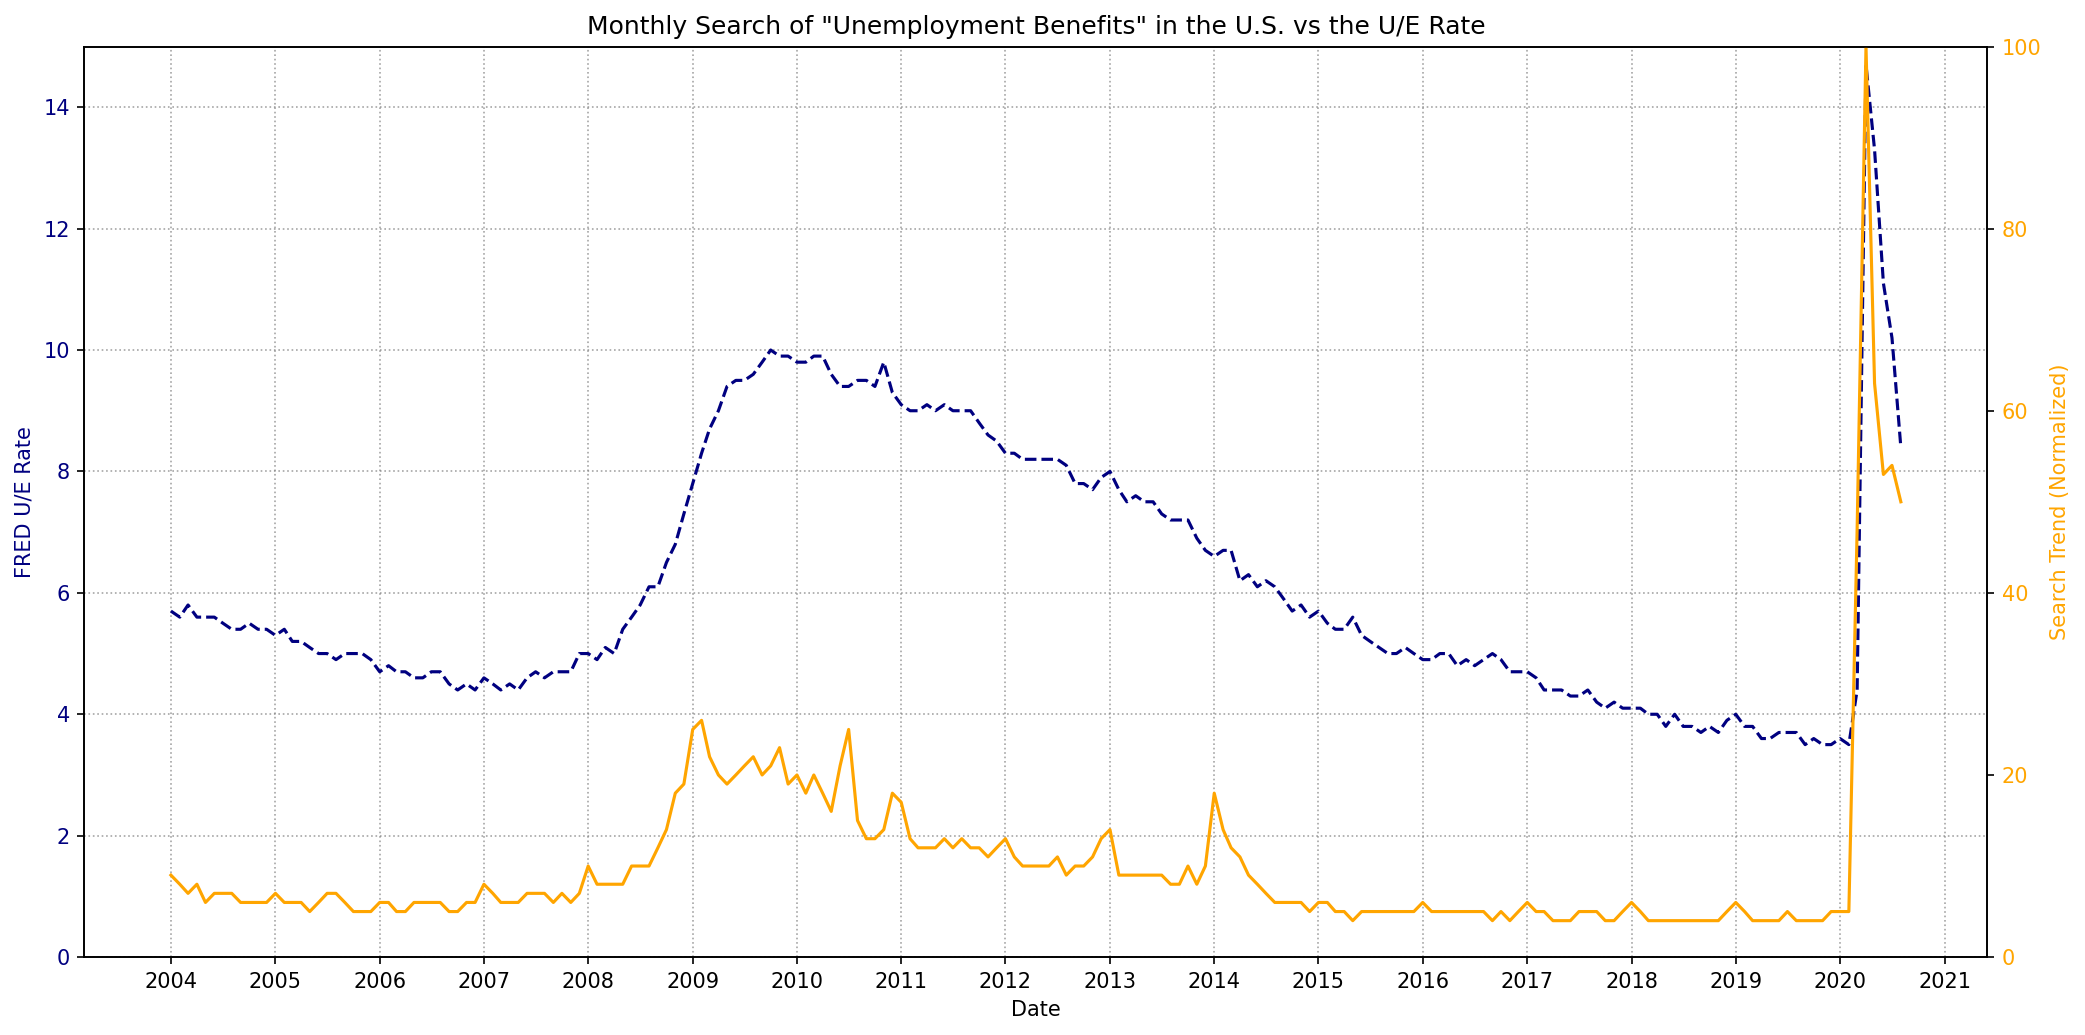

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set up date locators and formatters for the x-axis
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

# File path for UE Benefits data
file_path_ue = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0079__Day75_GoogleData_Resampling_and_Visualizing_Time_Series_240819\NewProject\r00-r09 START\r00_env_START\UE Benefits Search vs UE Rate 2004-20.csv'

# Load the data into a DataFrame
df_ue = pd.read_csv(file_path_ue)

# Convert 'MONTH' column to datetime format for better plotting
df_ue['MONTH'] = pd.to_datetime(df_ue['MONTH'])

# Prepare data for plotting
dates = df_ue['MONTH']
ue_search_trend = df_ue['UE_BENEFITS_WEB_SEARCH']  # UE Benefits web search trend
ue_rate = df_ue['UNRATE']  # Unemployment rate

# Create the figure and the first axis for the U/E Rate
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=150)  # Increase DPI for higher quality

# Plot U/E Rate on the first axis with a dashed navy line
ax1.plot(dates, ue_rate, label='U/E Rate', color='navy', linestyle='--', linewidth=1.5)  # Dashed line for U/E Rate
ax1.set_xlabel('Date')
ax1.set_ylabel('FRED U/E Rate', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_ylim(0, 15)  # Adjust U/E Rate limits as needed

# Apply date locators and formatters to the x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

# Create a second y-axis for the search trend
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot Search Trend on the second axis with a solid orange line
ax2.plot(dates, ue_search_trend, label='Search Trend', color='orange', linewidth=1.5)  # Solid line for UE Benefits search trend
ax2.set_ylabel('Search Trend (Normalized)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim(0, 100)  # Adjust the search trend limits

# Add a grey grid with dotted lines for each year
ax1.grid(True, which='major', linestyle=':', color='grey', alpha=0.7)

# Rotate x-axis labels for better readability and set the font size
plt.xticks(rotation=45, fontsize=14)  # Rotate labels and increase font size

# Add a title
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

# Ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


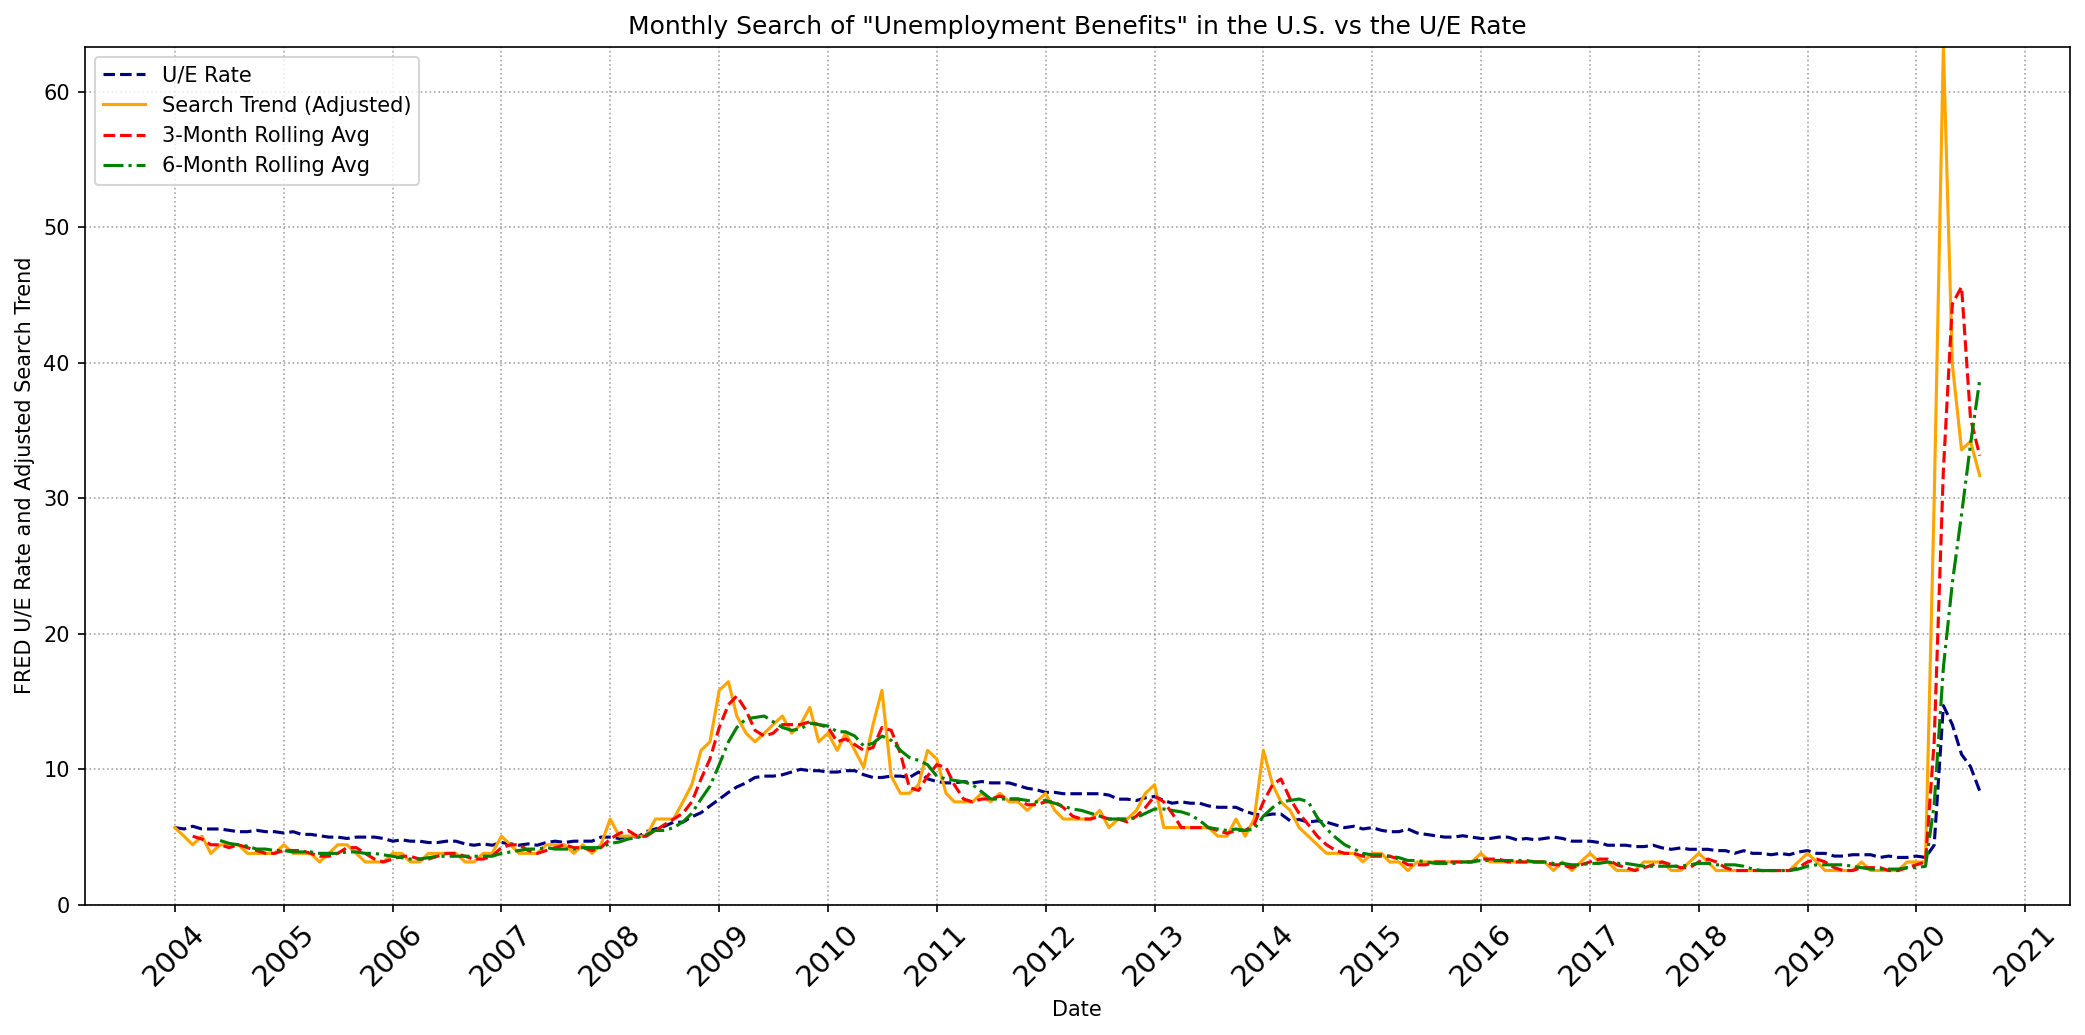

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set up date locators and formatters for the x-axis
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')

# File path for UE Benefits data
file_path_ue = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0079__Day75_GoogleData_Resampling_and_Visualizing_Time_Series_240819\NewProject\r00-r09 START\r00_env_START\UE Benefits Search vs UE Rate 2004-20.csv'

# Load the data into a DataFrame
df_ue = pd.read_csv(file_path_ue)

# Convert 'MONTH' column to datetime format for better plotting
df_ue['MONTH'] = pd.to_datetime(df_ue['MONTH'])

# Prepare data for plotting
dates = df_ue['MONTH']
ue_rate = df_ue['UNRATE']  # Unemployment rate

# Calculate the scaling factor to align the starting points
scaling_factor = df_ue['UNRATE'].iloc[0] / df_ue['UE_BENEFITS_WEB_SEARCH'].iloc[0]
offset = 0  # Adjust this if needed

# Apply scaling and offset to the search trend
ue_search_trend_adjusted = (df_ue['UE_BENEFITS_WEB_SEARCH'] * scaling_factor) + offset

# Calculate the 3-month and 6-month rolling averages
ue_search_trend_3m = ue_search_trend_adjusted.rolling(window=3).mean()
ue_search_trend_6m = ue_search_trend_adjusted.rolling(window=6).mean()

# Create the figure and the axis for all the data
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=150)  # Increase DPI for higher quality

# Plot U/E Rate on the first axis with a dashed navy line
ax1.plot(dates, ue_rate, label='U/E Rate', color='navy', linestyle='--', linewidth=1.5)  # Dashed line for U/E Rate

# Plot Adjusted Search Trend on the same axis with a solid orange line
ax1.plot(dates, ue_search_trend_adjusted, label='Search Trend (Adjusted)', color='orange', linewidth=1.5)  # Solid line for adjusted search trend

# Plot the 3-month and 6-month rolling averages on the same axis
ax1.plot(dates, ue_search_trend_3m, label='3-Month Rolling Avg', color='red', linewidth=1.5, linestyle='--')  # 3-month rolling average
ax1.plot(dates, ue_search_trend_6m, label='6-Month Rolling Avg', color='green', linewidth=1.5, linestyle='-.')  # 6-month rolling average

# Set labels and limits for the y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('FRED U/E Rate and Adjusted Search Trend', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0, max(ue_rate.max(), ue_search_trend_adjusted.max()))  # Set limits to accommodate both datasets

# Apply date locators and formatters to the x-axis
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

# Add a grey grid with dotted lines for each year
ax1.grid(True, which='major', linestyle=':', color='grey', alpha=0.7)

# Rotate x-axis labels for better readability and set the font size
plt.xticks(rotation=45, fontsize=14)  # Rotate labels and increase font size

# Add a title
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')

# Ensure everything fits well
plt.tight_layout()

# Add a legend to the plot
ax1.legend()

# Display the plot
plt.show()



### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

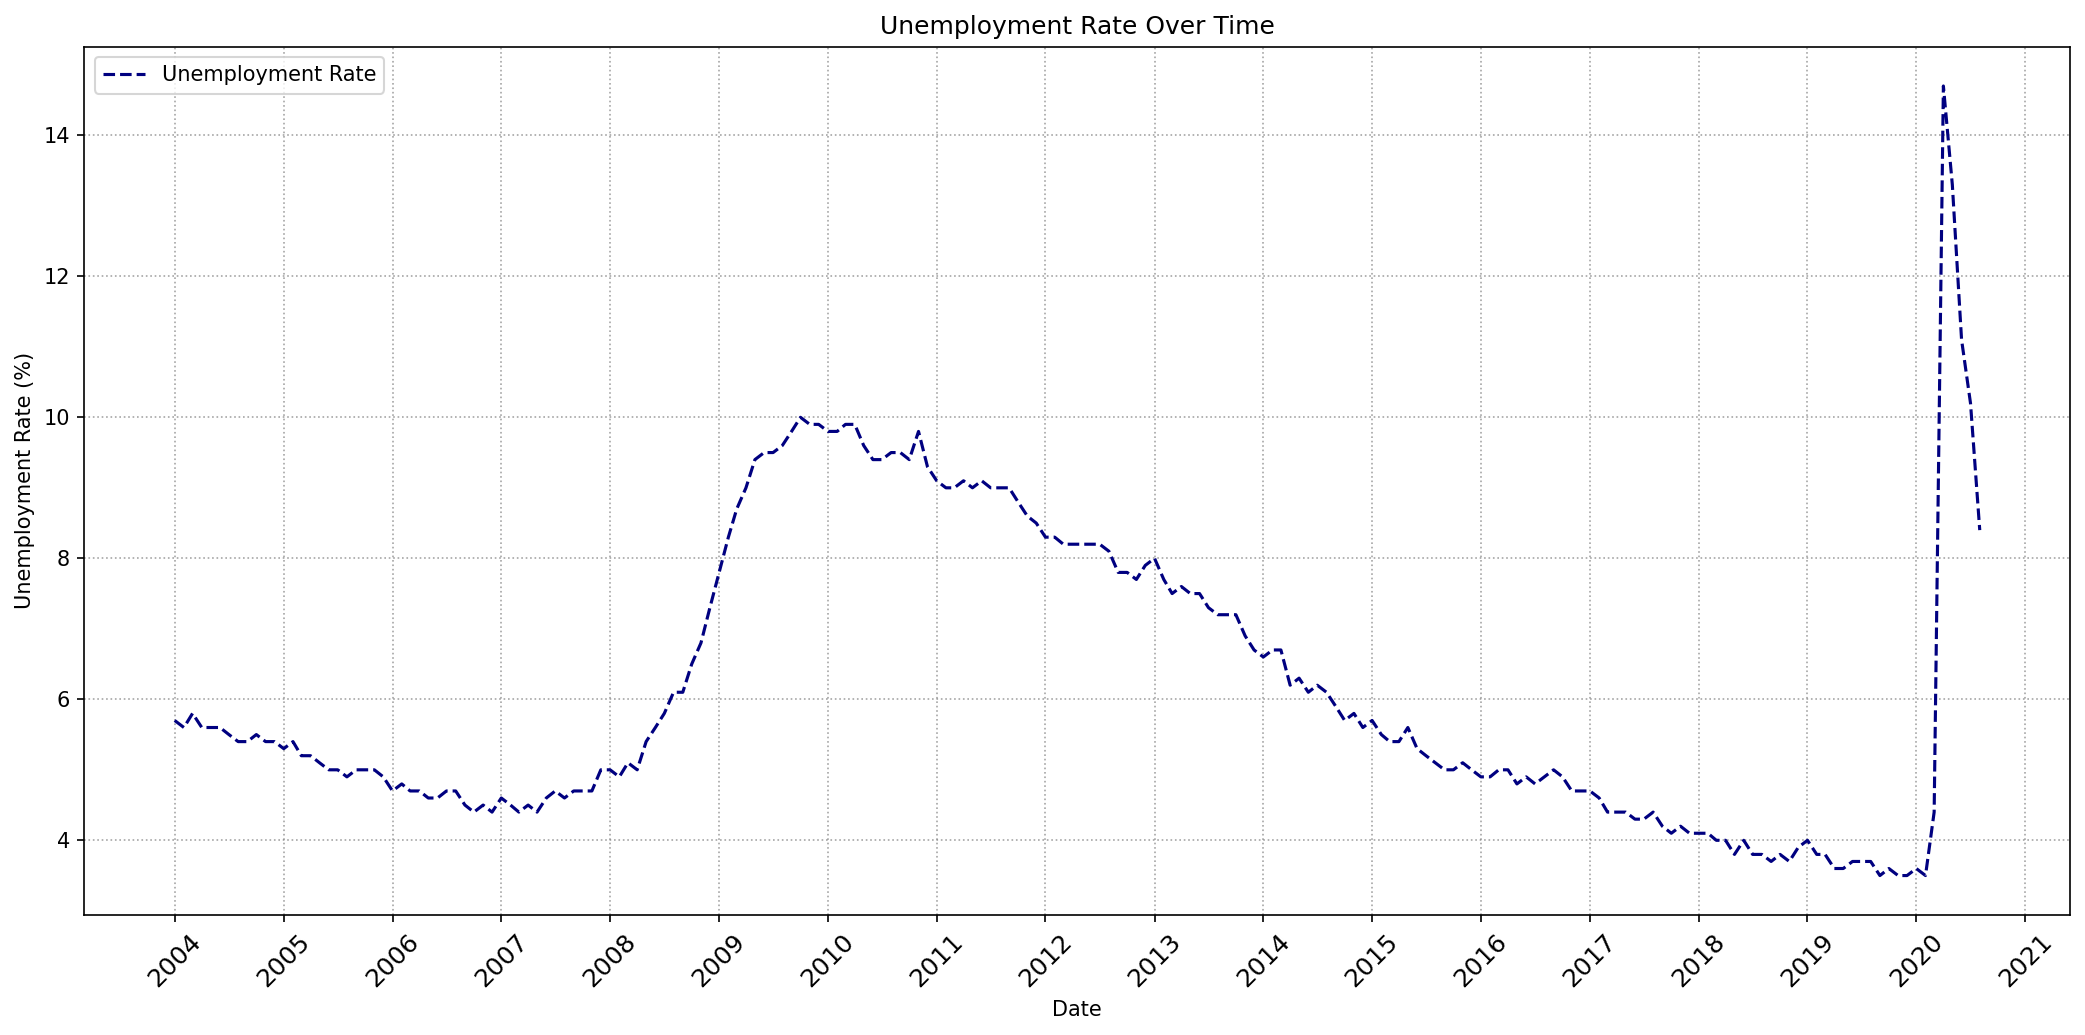

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Read the data into a DataFrame
file_path_ue = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0079__Day75_GoogleData_Resampling_and_Visualizing_Time_Series_240819\NewProject\r00-r09 START\r00_env_START\UE Benefits Search vs UE Rate 2004-20.csv'
df_ue = pd.read_csv(file_path_ue)

# Step 2: Convert the 'MONTH' column to datetime objects
df_ue['MONTH'] = pd.to_datetime(df_ue['MONTH'])

# Step 3: Prepare data for plotting
dates = df_ue['MONTH']
ue_rate = df_ue['UNRATE']  # Unemployment rate

# Step 4: Set up date locators and formatters for the x-axis
years = mdates.YearLocator()  # Locator for major ticks (years)
years_fmt = mdates.DateFormatter('%Y')  # Format x-axis labels as years

# Step 5: Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(14, 7), dpi=150)  # Increase DPI for higher quality

# Step 6: Plot the Unemployment Rate
ax.plot(dates, ue_rate, label='Unemployment Rate', color='navy', linestyle='--', linewidth=1.5)

# Step 7: Format the x-axis with date locators and formatters
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

# Step 8: Set labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Unemployment Rate Over Time')
ax.legend()

# Step 9: Add a grid for better readability
ax.grid(True, which='major', linestyle=':', color='grey', alpha=0.7)

# Step 10: Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Step 11: Display the plot
plt.tight_layout()
plt.show()


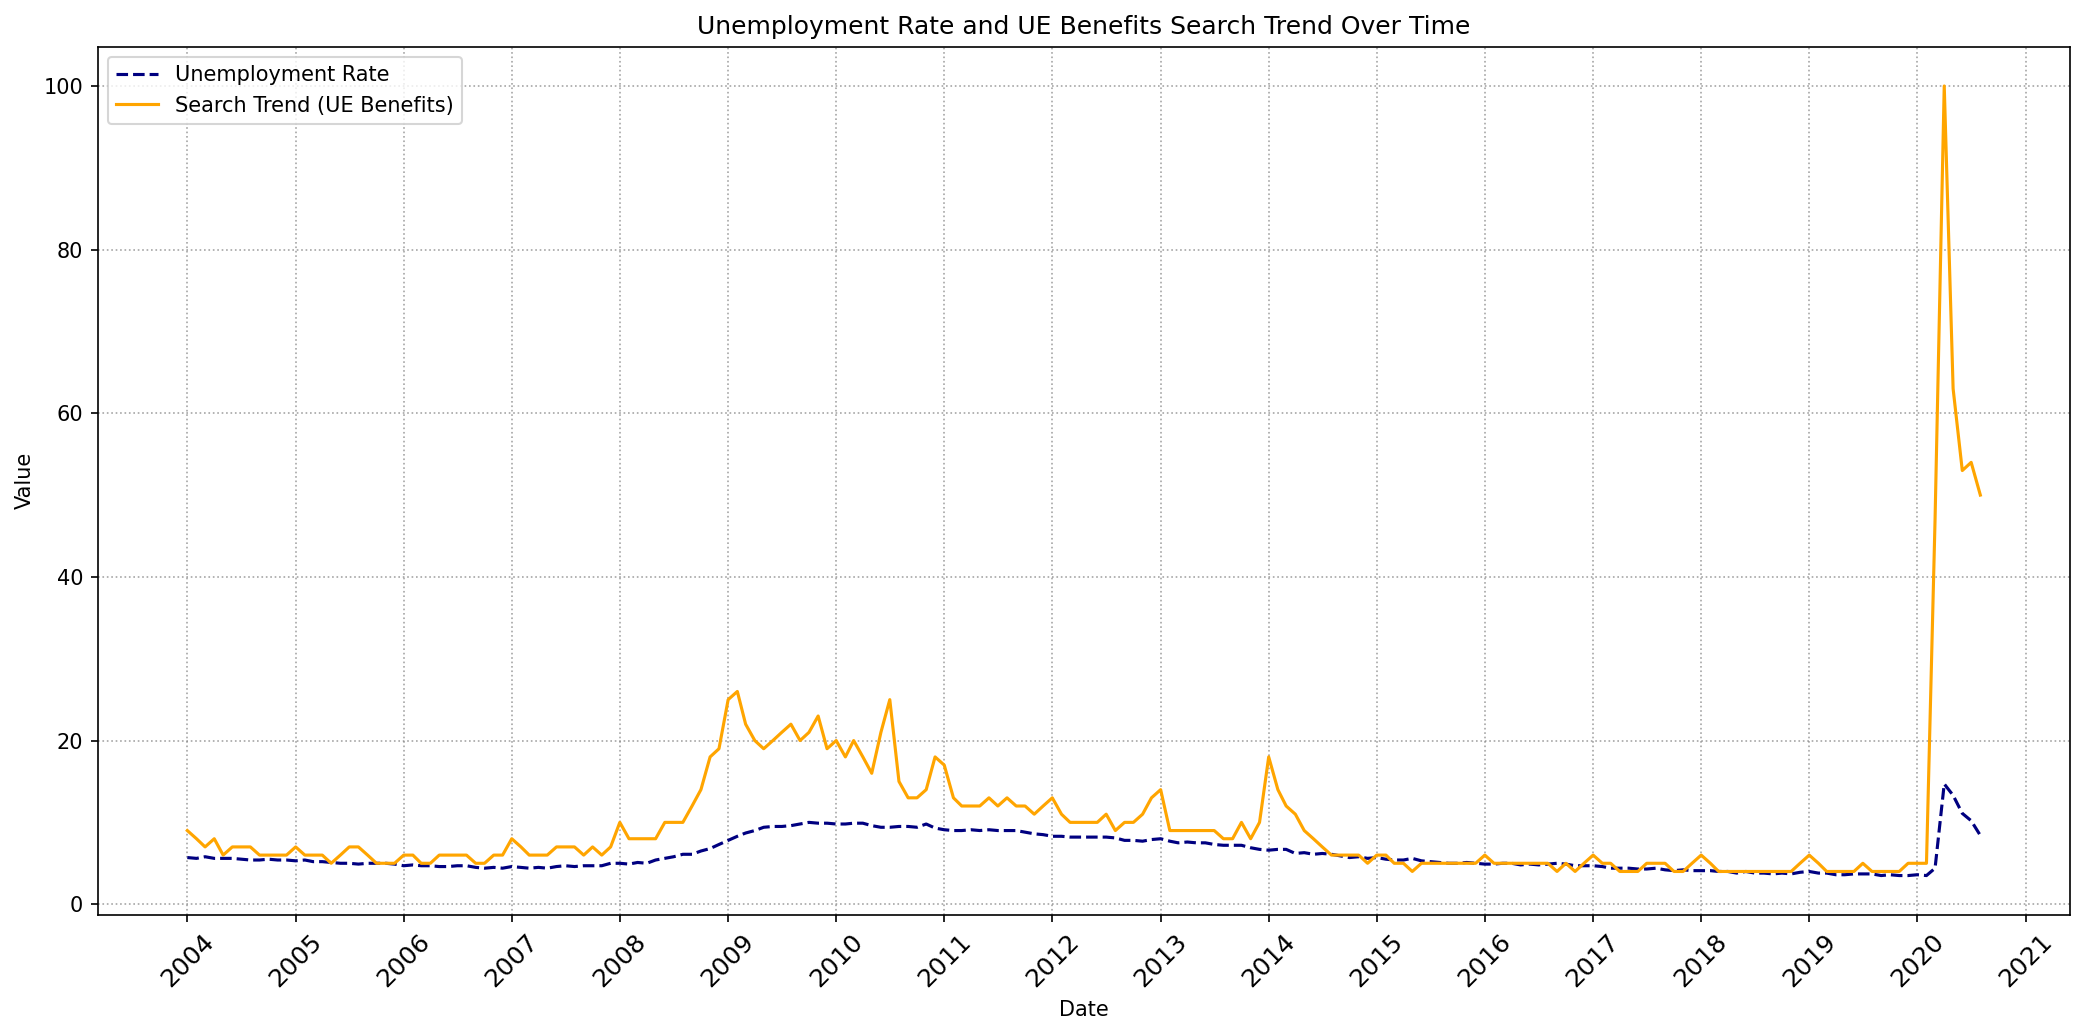

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Read the data into a DataFrame
file_path_ue = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0079__Day75_GoogleData_Resampling_and_Visualizing_Time_Series_240819\NewProject\r00-r09 START\r00_env_START\UE Benefits Search vs UE Rate 2004-20.csv'
df_ue = pd.read_csv(file_path_ue)

# Step 2: Convert the 'MONTH' column to datetime objects
df_ue['MONTH'] = pd.to_datetime(df_ue['MONTH'])

# Step 3: Prepare data for plotting
dates = df_ue['MONTH']
ue_rate = df_ue['UNRATE']  # Unemployment rate
ue_search_trend = df_ue['UE_BENEFITS_WEB_SEARCH']  # Search trend for UE Benefits

# Step 4: Set up date locators and formatters for the x-axis
years = mdates.YearLocator()  # Locator for major ticks (years)
years_fmt = mdates.DateFormatter('%Y')  # Format x-axis labels as years

# Step 5: Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=150)  # Increase DPI for higher quality

# Step 6: Plot the Unemployment Rate
ax1.plot(dates, ue_rate, label='Unemployment Rate', color='navy', linestyle='--', linewidth=1.5)

# Step 7: Plot the Search Trend for UE Benefits
ax1.plot(dates, ue_search_trend, label='Search Trend (UE Benefits)', color='orange', linestyle='-', linewidth=1.5)

# Step 8: Format the x-axis with date locators and formatters
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

# Step 9: Set labels, title, and legend
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.set_title('Unemployment Rate and UE Benefits Search Trend Over Time')
ax1.legend()

# Step 10: Add a grid for better readability
ax1.grid(True, which='major', linestyle=':', color='grey', alpha=0.7)

# Step 11: Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Step 12: Display the plot
plt.tight_layout()
plt.show()


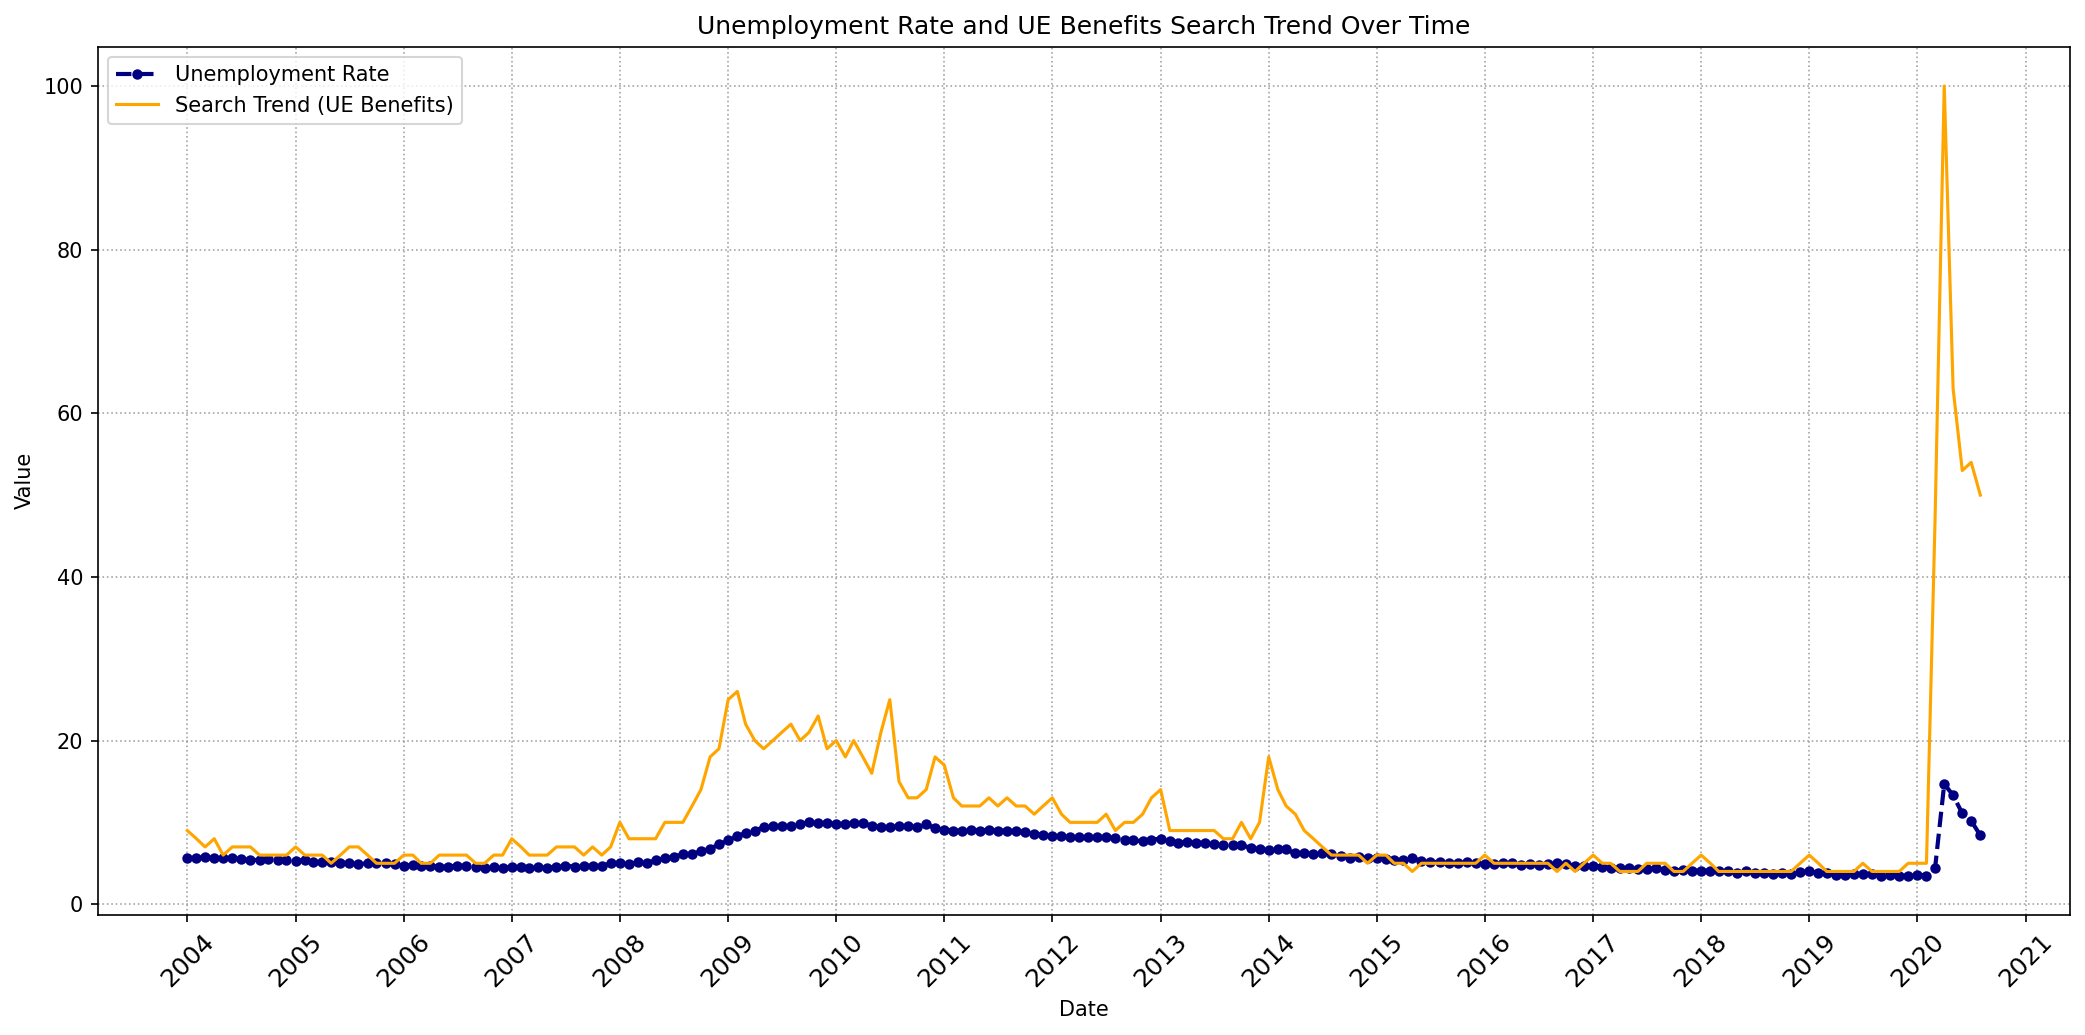

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Read the data into a DataFrame
file_path_ue = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0079__Day75_GoogleData_Resampling_and_Visualizing_Time_Series_240819\NewProject\r00-r09 START\r00_env_START\UE Benefits Search vs UE Rate 2004-20.csv'
df_ue = pd.read_csv(file_path_ue)

# Step 2: Convert the 'MONTH' column to datetime objects
df_ue['MONTH'] = pd.to_datetime(df_ue['MONTH'])

# Step 3: Prepare data for plotting
dates = df_ue['MONTH']
ue_rate = df_ue['UNRATE']  # Unemployment rate
ue_search_trend = df_ue['UE_BENEFITS_WEB_SEARCH']  # Search trend for UE Benefits

# Step 4: Set up date locators and formatters for the x-axis
years = mdates.YearLocator()  # Locator for major ticks (years)
years_fmt = mdates.DateFormatter('%Y')  # Format x-axis labels as years

# Step 5: Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=150)  # Increase DPI for higher quality

# Step 6: Plot the Unemployment Rate with more accurate representation
ax1.plot(dates, ue_rate, label='Unemployment Rate', color='navy', linestyle='--', linewidth=2, marker='o', markersize=4)

# Step 7: Plot the Search Trend for UE Benefits
ax1.plot(dates, ue_search_trend, label='Search Trend (UE Benefits)', color='orange', linestyle='-', linewidth=1.5)

# Step 8: Format the x-axis with date locators and formatters
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

# Step 9: Set labels, title, and legend
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.set_title('Unemployment Rate and UE Benefits Search Trend Over Time')
ax1.legend()

# Step 10: Add a grid for better readability
ax1.grid(True, which='major', linestyle=':', color='grey', alpha=0.7)

# Step 11: Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Step 12: Display the plot
plt.tight_layout()
plt.show()


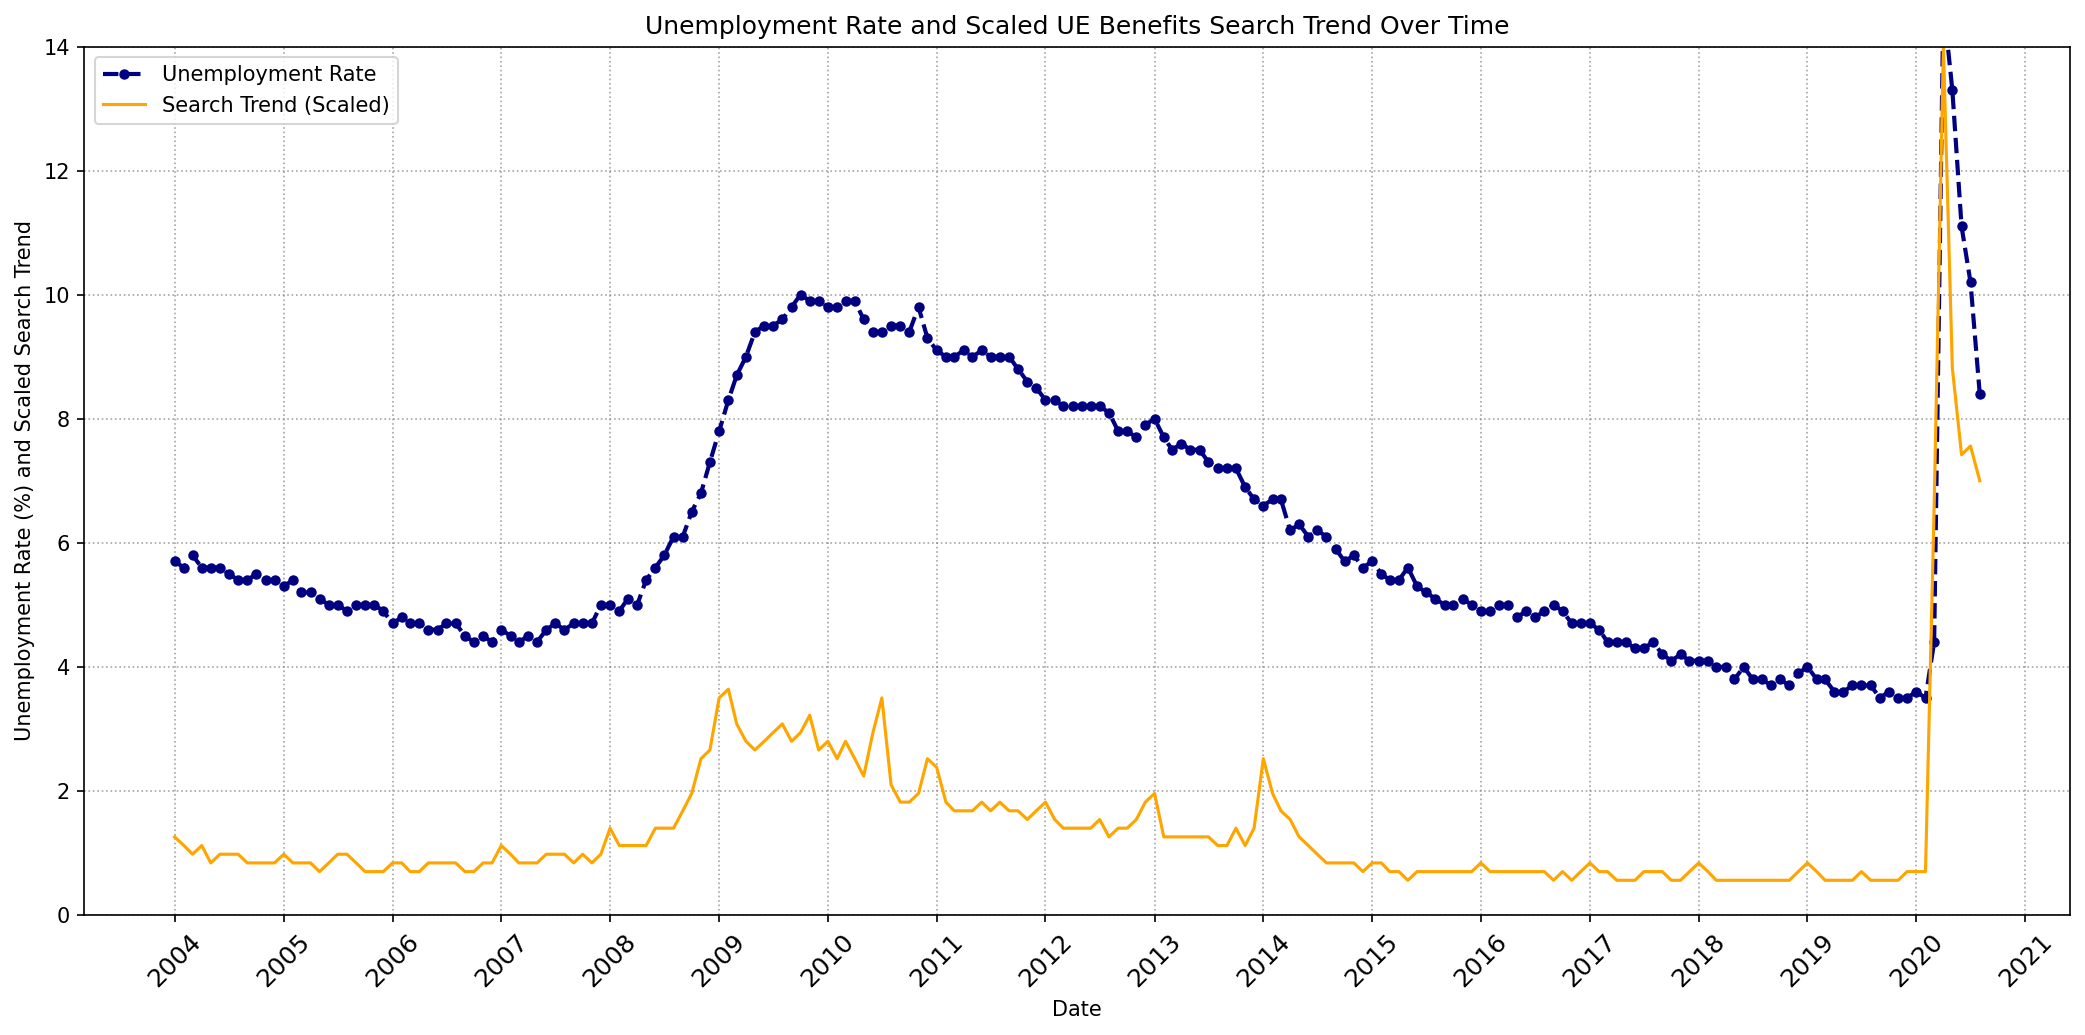

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: Read the data into a DataFrame
file_path_ue = r'C:\Users\Siris\Desktop\GitHub Projects 100 Days NewB\_24_0079__Day75_GoogleData_Resampling_and_Visualizing_Time_Series_240819\NewProject\r00-r09 START\r00_env_START\UE Benefits Search vs UE Rate 2004-20.csv'
df_ue = pd.read_csv(file_path_ue)

# Step 2: Convert the 'MONTH' column to datetime objects
df_ue['MONTH'] = pd.to_datetime(df_ue['MONTH'])

# Step 3: Prepare data for plotting
dates = df_ue['MONTH']
ue_rate = df_ue['UNRATE']  # Unemployment rate
ue_search_trend = df_ue['UE_BENEFITS_WEB_SEARCH']  # Search trend for UE Benefits

# Step 4: Scale the Search Trend to fit within the same range as the U/E Rate
scaling_factor = 14 / 100  # 100 maps to 14 on the y-axis
ue_search_trend_scaled = ue_search_trend * scaling_factor

# Step 5: Set up date locators and formatters for the x-axis
years = mdates.YearLocator()  # Locator for major ticks (years)
years_fmt = mdates.DateFormatter('%Y')  # Format x-axis labels as years

# Step 6: Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(14, 7), dpi=150)  # Increase DPI for higher quality

# Step 7: Plot the Unemployment Rate with markers for better accuracy
ax1.plot(dates, ue_rate, label='Unemployment Rate', color='navy', linestyle='--', linewidth=2, marker='o', markersize=4)

# Step 8: Plot the Scaled Search Trend for UE Benefits
ax1.plot(dates, ue_search_trend_scaled, label='Search Trend (Scaled)', color='orange', linestyle='-', linewidth=1.5)

# Step 9: Format the x-axis with date locators and formatters
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)

# Step 10: Set labels, title, and legend
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%) and Scaled Search Trend')
ax1.set_ylim(0, 14)  # Cap the y-axis at 14 to match the UE Rate
ax1.set_title('Unemployment Rate and Scaled UE Benefits Search Trend Over Time')
ax1.legend()

# Step 11: Add a grid for better readability
ax1.grid(True, which='major', linestyle=':', color='grey', alpha=0.7)

# Step 12: Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Step 13: Display the plot
plt.tight_layout()
plt.show()
